# Census Data

In [40]:
from census import Census
import pandas as pd
from pathlib import Path
from us import states
import sys
import matplotlib.pyplot as plt

# Ignnore warning
import warnings
warnings.simplefilter(action='ignore')

# Local modules
sys.path.append("Local_Modules/")
import codebook
from codebook import replace_code_by_value, get_distribution

## Define age brackets for shooters

In [14]:
# Import shooter data
shooters_df = pd.read_csv(Path('clean_data/clean_shooters.csv'))

shooter_profile = shooters_df[
        [
        'Age',
        'Mental Illness',
        'Employment Status',
        'Highest Level of Justice System Involvement',
        'Autism Spectrum'
        ]]

shooter_profile.head()

,Age,Mental Illness,Employment Status,Highest Level of Justice System Involvement,Autism Spectrum
0,25,1,0,4,0
1,18,2,0,0,0
2,39,4,1,1,0
3,56,0,1,0,0
4,31,2,0,0,0


In [29]:
group_names = [
    'Under 10 years old', '10 to 14 years', '15 to 17 years', '18 and 19 years', '20 years', '21 years', '22 to 24 years', '25 to 29 years',
    '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years', '50 to 54 years', '55 to 59 years', '60 and 61 years', '62 to 64 years', '65 and 66 years',
    '67 to 69 years', '70 to 74 years', '75 years and over'
]

bins = [0, 10, 14, 17, 19, 20, 21, 24, 29, 34, 39, 44, 49, 54, 59, 61, 64, 66, 69, 74, 100]

shooter_profile["Age Bracket"] = pd.cut(shooter_profile["Age"], bins, labels = group_names, include_lowest = True)
shooter_profile.head()

,Age,Mental Illness,Employment Status,Highest Level of Justice System Involvement,Autism Spectrum,Age Bracket
0,25,1,0,4,0,25 to 29 years
1,18,2,0,0,0,18 and 19 years
2,39,4,1,1,0,35 to 39 years
3,56,0,1,0,0,55 to 59 years
4,31,2,0,0,0,30 to 34 years


In [30]:
print(f"Youngest shooter: {shooter_profile['Age'].min()} years old")
print(f"Oldest shooter: {shooter_profile['Age'].max()} years old")

Youngest shooter: 11 years old
Oldest shooter: 72 years old


In [34]:
# Check age bracket
for index, row in shooter_profile.iterrows():
    print(shooter_profile[['Age', 'Age Bracket']])

     Age      Age Bracket
0     25   25 to 29 years
1     18  18 and 19 years
2     39   35 to 39 years
3     56   55 to 59 years
4     31   30 to 34 years
..   ...              ...
188   72   70 to 74 years
189   66  65 and 66 years
190   28   25 to 29 years
191   25   25 to 29 years
192   33   30 to 34 years

[193 rows x 2 columns]
     Age      Age Bracket
0     25   25 to 29 years
1     18  18 and 19 years
2     39   35 to 39 years
3     56   55 to 59 years
4     31   30 to 34 years
..   ...              ...
188   72   70 to 74 years
189   66  65 and 66 years
190   28   25 to 29 years
191   25   25 to 29 years
192   33   30 to 34 years

[193 rows x 2 columns]
     Age      Age Bracket
0     25   25 to 29 years
1     18  18 and 19 years
2     39   35 to 39 years
3     56   55 to 59 years
4     31   30 to 34 years
..   ...              ...
188   72   70 to 74 years
189   66  65 and 66 years
190   28   25 to 29 years
191   25   25 to 29 years
192   33   30 to 34 years

[193 rows x 2 c

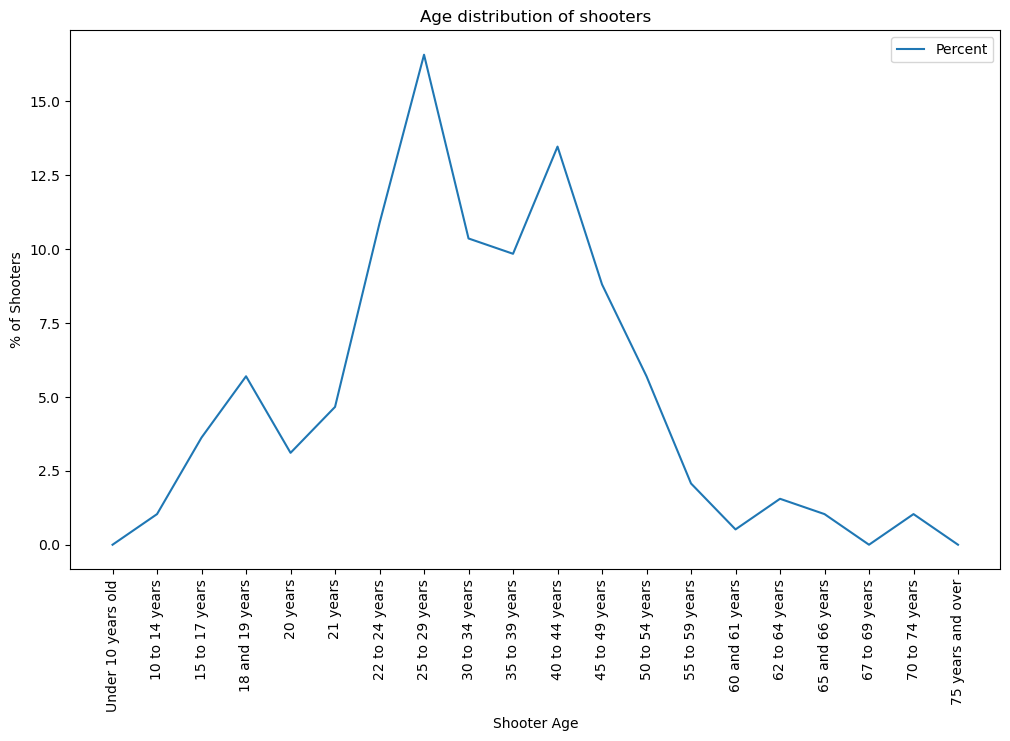

In [45]:
stat_df = get_distribution(shooter_profile, 'Age Bracket',0)

# Plot distribution of shooter over age brackets
stat_df.sort_index().plot.line(y='Percent',figsize=(12,7))
plt.title('Age distribution of shooters')
plt.xticks(list(range(len(group_names))),group_names,rotation=90)
plt.xlabel('Shooter Age')
plt.ylabel('% of Shooters')
plt.show()

## Age brackets for Male in each state (all races)

In [48]:
c = Census("01518d8c4cd0a768de3d4e54c9b2e07b24400070", year=2021)

# Data for male only
census_variables = [
    'B01001_003E', 'B01001_004E', 'B01001_005E', 'B01001_006E', 'B01001_007E', 'B01001_008E', 'B01001_009E', 'B01001_010E', 'B01001_011E', 
    'B01001_012E', 'B01001_013E', 'B01001_014E', 'B01001_015E', 'B01001_016E', 'B01001_017E', 'B01001_018E', 'B01001_019E', 'B01001_020E',
    'B01001_021E', 'B01001_022E', 'B01001_023E', 'B01001_024E', 'B01001_025E'
]

renamed_variables = [
    'Under 5 years old', '5 to 9 years', '10 to 14 years', '15 to 17 years', '18 and 19 years', '20 years', '21 years', '22 to 24 years', '25 to 29 years',
    '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years', '50 to 54 years', '55 to 59 years', '60 and 61 years', '62 to 64 years', '65 and 66 years',
    '67 to 69 years', '70 to 74 years', '75 to 79 years', '80 to 84 years', '85 years and over'
]

census_data = c.acs5.get(tuple(census_variables),{'for': 'state:*'})

# Convert to DataFrame
male_age_census_pd = pd.DataFrame(census_data)

# Rename columns
for i in range(len(census_variables)):
    male_age_census_pd = male_age_census_pd.rename(columns={census_variables[i]: renamed_variables[i]})

# Rename states with two-letter acronym
for index, row in male_age_census_pd.iterrows():
    try:
        male_age_census_pd.loc[index,'state'] = states.lookup(male_age_census_pd.loc[index,'state']).abbr
    except:
        male_age_census_pd.loc[index,'state'] = 'DC'

# Calculate total population
male_age_census_pd['Total Population'] = male_age_census_pd[renamed_variables].sum(axis=1)

# Join columns to have age brackets compatible with shooter information
male_age_census_pd['Under 10 years old'] = male_age_census_pd['Under 5 years old'] + male_age_census_pd['5 to 9 years']
male_age_census_pd = male_age_census_pd.drop(columns=['Under 5 years old', '5 to 9 years'])

male_age_census_pd['75 years and over'] = male_age_census_pd['75 to 79 years'] + male_age_census_pd['80 to 84 years'] + male_age_census_pd['85 years and over']
male_age_census_pd = male_age_census_pd.drop(columns=['75 to 79 years','80 to 84 years','85 years and over'])

# Reorder columns
male_age_census_pd = male_age_census_pd[['state',
                      'Total Population',
                      'Under 10 years old',
                      '10 to 14 years',
                      '15 to 17 years',
                      '18 and 19 years',
                      '20 years',
                      '21 years',
                      '22 to 24 years',
                      '25 to 29 years',
                      '30 to 34 years',
                      '35 to 39 years',
                      '40 to 44 years',
                      '45 to 49 years',
                      '50 to 54 years',
                      '55 to 59 years',
                      '60 and 61 years',
                      '62 to 64 years',
                      '65 and 66 years',
                      '67 to 69 years',
                      '70 to 74 years',
                      '75 years and over']]


male_age_census_pd.sort_values('state')

,state,Total Population,Under 10 years old,10 to 14 years,15 to 17 years,18 and 19 years,20 years,21 years,22 to 24 years,25 to 29 years,...,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 and 61 years,62 to 64 years,65 and 66 years,67 to 69 years,70 to 74 years,75 years and over
1,AK,384749.0,53344.0,25485.0,14977.0,9878.0,5752.0,6367.0,16982.0,31655.0,...,23105.0,22986.0,23455.0,24551.0,10519.0,13514.0,8773.0,10712.0,12359.0,13183.0
0,AL,2429703.0,306437.0,167636.0,99974.0,67361.0,36835.0,33355.0,93427.0,165130.0,...,149679.0,153164.0,156801.0,164053.0,65142.0,94891.0,57161.0,74995.0,105919.0,134064.0
3,AR,1483520.0,195133.0,105077.0,62435.0,41759.0,23469.0,20434.0,57146.0,99040.0,...,91170.0,90448.0,90745.0,97843.0,38021.0,52218.0,33650.0,44903.0,62538.0,85634.0
2,AZ,3533895.0,435518.0,244849.0,144036.0,99223.0,51285.0,49589.0,147241.0,256594.0,...,219194.0,212042.0,207834.0,211546.0,85825.0,118151.0,76219.0,107192.0,160666.0,232861.0
4,CA,19714044.0,2449793.0,1362100.0,792617.0,529966.0,279345.0,269923.0,800634.0,1538050.0,...,1296275.0,1273168.0,1264017.0,1239784.0,482736.0,643638.0,389220.0,508667.0,683160.0,968479.0
5,CO,2895936.0,342794.0,191554.0,112904.0,78517.0,40101.0,35842.0,118708.0,229868.0,...,199930.0,187740.0,176751.0,181659.0,71058.0,97753.0,61271.0,80442.0,107867.0,129684.0
6,CT,1768860.0,192976.0,115470.0,72468.0,52870.0,25866.0,23950.0,74077.0,113856.0,...,106582.0,112721.0,126100.0,130797.0,52437.0,71499.0,39968.0,54345.0,73549.0,106041.0
8,DC,325490.0,39225.0,16300.0,7748.0,9435.0,4547.0,3904.0,13869.0,35427.0,...,22695.0,19030.0,18207.0,18298.0,6256.0,8478.0,5345.0,6660.0,9414.0,13099.0
7,DE,477219.0,56213.0,30950.0,18348.0,12680.0,6756.0,6479.0,16265.0,32141.0,...,26794.0,27899.0,30730.0,34190.0,12531.0,19347.0,12072.0,17742.0,23098.0,31094.0
9,FL,10489548.0,1155198.0,644169.0,379009.0,249648.0,127817.0,129735.0,374472.0,695887.0,...,647529.0,664590.0,691110.0,714509.0,286697.0,390219.0,253050.0,356097.0,528650.0,839105.0


## Save as CSV

In [167]:
male_age_census_pd.to_csv('clean_data/clean_male_population_age.csv', index=False)

## Distribution of population over age brackets

In [122]:
# Load census age data
csv = Path('clean_data/clean_male_population_age.csv')
male_age_census_pd = pd.read_csv(csv)

In [123]:
def get_state_age_distribution(male_age_census_pd, state):
    # Filter data based on state
    state_data_percent = male_age_census_pd.loc[male_age_census_pd['state']==state,:]

    # Reset and delete index column
    state_data_percent = state_data_percent.reset_index()
    state_data_percent = state_data_percent.drop(columns='index')

    # Calculate Percent of population in each age bracket
    for b in group_names:
        state_data_percent.loc[0,b] = 100*state_data_percent.loc[0,b]/state_data_percent.loc[0,'Total Population']

    # Drop ununsed columns
    state_data_percent = state_data_percent.drop(columns=['state','Total Population'])

    # Transpose DataFrame
    state_data_percent = state_data_percent.transpose()

    # Rename state column
    state_data_percent = state_data_percent.rename(columns={0: state})

    # Return DataFrame for state
    return state_data_percent

def plot_age_distribution(stat_df, state_data_percent, state):
    # Plot distribution of shooter over age brackets
    stat_df = stat_df.sort_index()

    plt.figure(figsize=(12,7))
    plt.grid()
    plt.plot(stat_df['Percent'])
    plt.plot(state_data_percent[state])
    plt.legend(["Shooters (All states)", f"Gen Pop (State = {state})"])
    plt.title('Age distribution of male individuals')
    plt.xticks(list(range(len(group_names))),group_names,rotation=90)
    plt.xlabel('Age')
    plt.ylabel('% of People in Age Bracket')
    plt.show()


In [159]:
def get_age_risk_factor_table(stat_df, male_age_census_pd, state):
    # Filter census data by state
    state_data_percent = get_state_age_distribution(male_age_census_pd, state).reset_index()
    stat_df_w_index = stat_df.reset_index()

    # Merge census data and shooter dataframes
    age_risk_factor = pd.merge(state_data_percent, stat_df_w_index, how='outer', on='index')
    age_risk_factor = age_risk_factor.drop(columns=['Age Bracket'])

    # Add new column with Risk
    age_risk_factor['Risk'] = age_risk_factor['Percent']/age_risk_factor[state]

    # Drop unnecessary columns
    age_risk_factor = age_risk_factor.drop(columns=[state, 'Percent'])

    # Rename columns
    age_risk_factor = age_risk_factor.rename(columns={'Risk': state})

    # Get column names
    column_names = age_risk_factor['index'].tolist()

    # Transpose DataFrame
    age_risk_factor_t = age_risk_factor.transpose()

    # Rename columns to age brackets
    for i in range(len(column_names)):
        age_risk_factor_t = age_risk_factor_t.rename(columns={i: column_names[i]})

    # Drop first row
    age_risk_factor_t = age_risk_factor_t.iloc[1:]

    # Return risk factor DataFrame
    return age_risk_factor_t

## Calculate risk factors for age brackets

In [168]:
stat_df

,Age Bracket,Percent
Under 10 years old,0,0.000000
10 to 14 years,2,1.036269
15 to 17 years,7,3.626943
18 and 19 years,11,5.699482
20 years,6,3.108808
21 years,9,4.663212
22 to 24 years,21,10.880829
25 to 29 years,32,16.580311
30 to 34 years,20,10.362694
35 to 39 years,19,9.844560


In [166]:
# Get all states available in census data
states = male_age_census_pd['state'].tolist()

# Create age risk table for first state in list
state = states[0]
age_risk_factor = get_age_risk_factor_table(stat_df, male_age_census_pd, state)

# Create and join age risk tables for all other states
for state in states[1:]:
    age_risk_factor = pd.concat([age_risk_factor, get_age_risk_factor_table(stat_df, male_age_census_pd, state)])

age_risk_factor

,Under 10 years old,10 to 14 years,15 to 17 years,18 and 19 years,20 years,21 years,22 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 and 61 years,62 to 64 years,65 and 66 years,67 to 69 years,70 to 74 years,75 years and over
AL,0.0,0.150196,0.881469,2.055796,2.050626,3.396858,2.829715,2.439607,1.634751,1.598246,2.186796,1.397295,0.883161,0.306953,0.193257,0.398008,0.44048,0.0,0.237712,0.0
AK,0.0,0.156446,0.931737,2.219953,2.07947,2.817915,2.465191,2.015245,1.333145,1.390231,2.243301,1.474367,0.934926,0.324796,0.189516,0.442545,0.454467,0.0,0.322602,0.0
AZ,0.0,0.149564,0.889863,2.029909,2.142186,3.323177,2.611481,2.283494,1.507185,1.50568,2.171906,1.467991,0.969109,0.346219,0.213345,0.464922,0.480466,0.0,0.22793,0.0
AR,0.0,0.146305,0.861799,2.024784,1.965137,3.385519,2.824682,2.483564,1.613212,1.512474,2.192086,1.444728,0.931764,0.314244,0.202168,0.441608,0.456858,0.0,0.245823,0.0
CA,0.0,0.149982,0.902097,2.120133,2.19396,3.405815,2.679191,2.125191,1.345713,1.362524,2.048777,1.363897,0.888911,0.329558,0.211597,0.4761,0.524872,0.0,0.299038,0.0
CO,0.0,0.156664,0.930294,2.102135,2.245059,3.767749,2.654428,2.08883,1.281644,1.311715,1.951313,1.358701,0.933818,0.330396,0.211163,0.460493,0.489786,0.0,0.27821,0.0
CT,0.0,0.158744,0.885295,1.906863,2.125975,3.444079,2.598197,2.575907,1.628797,1.572338,2.235762,1.38223,0.799491,0.280284,0.174783,0.384554,0.458621,0.0,0.249224,0.0
DE,0.0,0.159783,0.943343,2.145032,2.195948,3.434749,3.192461,2.46179,1.5616,1.5545,2.399364,1.506679,0.885096,0.289282,0.197322,0.383414,0.409648,0.0,0.2141,0.0
DC,0.0,0.20693,1.523662,1.966216,2.225393,3.887882,2.55361,1.523337,0.899047,1.066822,1.932073,1.506574,1.018907,0.368669,0.269577,0.596772,0.631048,0.0,0.358291,0.0
FL,0.0,0.168745,1.003802,2.394771,2.551303,3.770377,3.047891,2.499256,1.56579,1.546256,2.182296,1.390255,0.865057,0.304265,0.189573,0.417842,0.429559,0.0,0.205618,0.0


## Plot age distribution for comparison between state census and shooter information

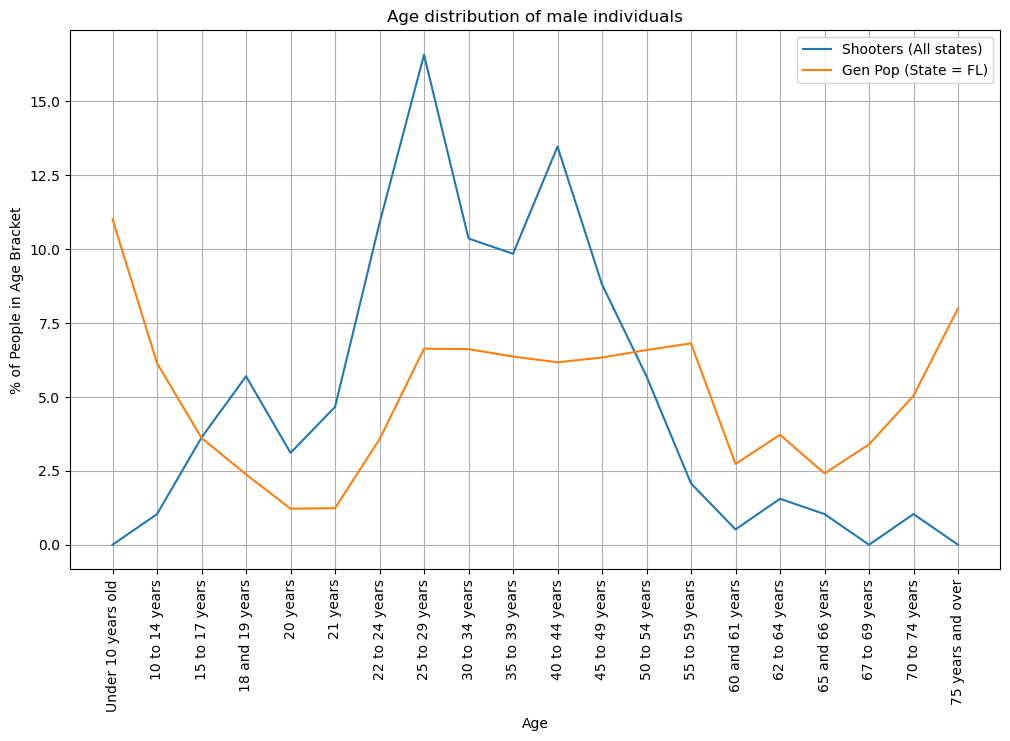

In [117]:
# Select state
state = 'FL'
state_data_percent = get_state_age_distribution(male_age_census_pd, state)
plot_age_distribution(stat_df, state_data_percent, state)

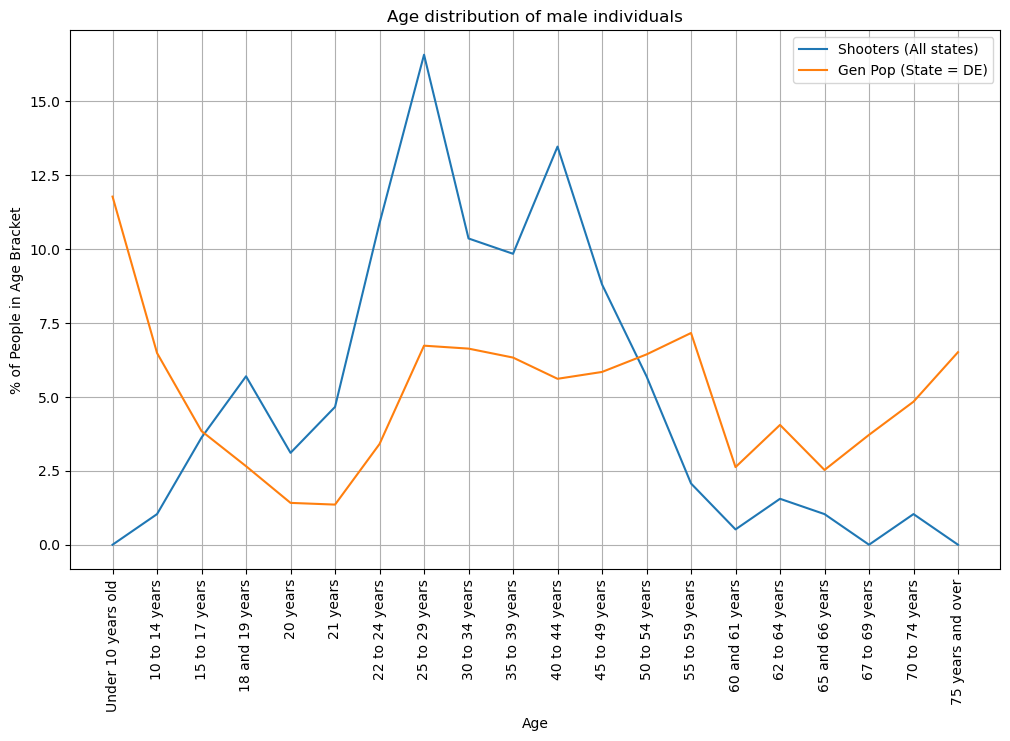

In [119]:
# Select state
state = 'DE'
state_data_percent = get_state_age_distribution(male_age_census_pd, state)
plot_age_distribution(stat_df, state_data_percent, state)